In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
 
df = pd.read_excel('accidents_2009_to_2014.xlsx')
 
print("Column headings:")
print(df.columns)

Column headings:
Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Year',
       'Month_num', 'Month_name', 'Day_num', 'Day_name', 'Time', 'Hour',
       'Local_Authority_(District)', 'Borough _name', 'Borough _name.1',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Year.1',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')


### Which days of the week do accidents most often?

In [2]:
#Determine the number of accidents for each day of the week by month (combine years 2009-2014)

def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month_name"] == month and row["Day_name"] == "Monday": mon +=1
        elif row["Month_name"] == month and row["Day_name"] == "Tuesday": tues +=1
        elif row["Month_name"] == month and row["Day_name"] == "Wednesday": wed +=1
        elif row["Month_name"] == month and row["Day_name"] == "Thursday": thurs +=1
        elif row["Month_name"] == month and row["Day_name"] == "Friday": fri +=1
        elif row["Month_name"] == month and row["Day_name"] == "Saturday": sat +=1
        elif row["Month_name"] == month and row["Day_name"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)


In [3]:
#Extract RTA data for each day by month
january = RTAs_by_month(df, "January")
february = RTAs_by_month(df, "February")
march = RTAs_by_month(df, "March")
april = RTAs_by_month(df, "April")
may = RTAs_by_month(df, "May")
june = RTAs_by_month(df, "June")
july = RTAs_by_month(df, "July")
august = RTAs_by_month(df, "August")
september = RTAs_by_month(df, "September")
october = RTAs_by_month(df, "October")
november = RTAs_by_month(df, "November")
december = RTAs_by_month(df, "December")


In [4]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [5]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,1646,1693,1651,1687,1810,1422,1168
February,1384,1610,1645,1701,1749,1457,1056
March,1959,1966,1845,1916,2077,1679,1322
April,1650,1862,1948,1827,1823,1472,1269
May,1719,2117,1975,2092,2190,1723,1510
June,1863,2154,2093,2071,2088,1809,1437
July,2010,2139,2214,2171,2299,1738,1464
August,1667,1769,1765,1899,2060,1634,1349
September,1945,2191,2226,2092,2180,1664,1396
October,2066,2209,2333,2220,2523,2007,1434


Text(0.5,1,'Traffic Accidents by week for each month from 2009-2014')

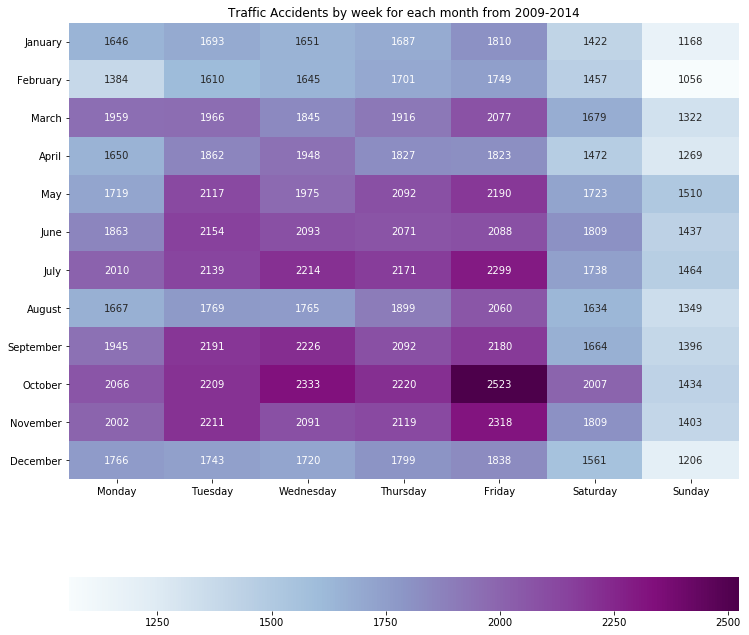

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents by week for each month from 2009-2014")


### Which times of the day accidents most often occur?

In [7]:
#Function to determine number of accidents for each day of the week by hour (combine years 2009-2014)

def RTAs_by_hour(df, hour):
    hour_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Hour"] == hour and row["Day_name"] == "Monday": mon +=1
        elif row["Hour"] == hour and row["Day_name"] == "Tuesday": tues +=1
        elif row["Hour"] == hour and row["Day_name"] == "Wednesday": wed +=1
        elif row["Hour"] == hour and row["Day_name"] == "Thursday": thurs +=1
        elif row["Hour"] == hour and row["Day_name"] == "Friday": fri +=1
        elif row["Hour"] == hour and row["Day_name"] == "Saturday": sat +=1
        elif row["Hour"] == hour and row["Day_name"] == "Sunday": sun +=1
        else: a=0 

    hour_list.append(mon)
    hour_list.append(tues)
    hour_list.append(wed)
    hour_list.append(thurs)
    hour_list.append(fri)
    hour_list.append(sat)
    hour_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(hour_list)


In [8]:
hour_0 = RTAs_by_hour(df, 0)
hour_1 = RTAs_by_hour(df, 1)
hour_2 = RTAs_by_hour(df, 2)
hour_3 = RTAs_by_hour(df, 3)
hour_4 = RTAs_by_hour(df, 4)
hour_5 = RTAs_by_hour(df, 5)
hour_6 = RTAs_by_hour(df, 6)
hour_7 = RTAs_by_hour(df, 7)
hour_8 = RTAs_by_hour(df, 8)
hour_9 = RTAs_by_hour(df, 9)
hour_10 = RTAs_by_hour(df, 10)
hour_11 = RTAs_by_hour(df, 11)
hour_12 = RTAs_by_hour(df, 12)
hour_13 = RTAs_by_hour(df, 13)
hour_14 = RTAs_by_hour(df, 14)
hour_15 = RTAs_by_hour(df, 15)
hour_16 = RTAs_by_hour(df, 16)
hour_17 = RTAs_by_hour(df, 17)
hour_18 = RTAs_by_hour(df, 18)
hour_19 = RTAs_by_hour(df, 19)
hour_20 = RTAs_by_hour(df, 20)
hour_21 = RTAs_by_hour(df, 21)
hour_22 = RTAs_by_hour(df, 22)
hour_23 = RTAs_by_hour(df, 23)
hour_24 = RTAs_by_hour(df, 24)

In [9]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)

Text(0.5,1,'Traffic Accidents by hour for each day from 2009-2014')

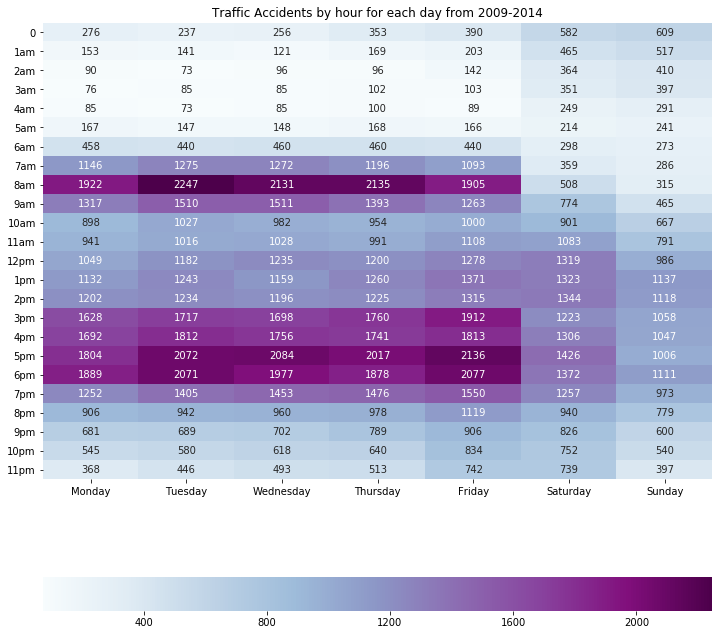

In [10]:
#Creat heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title("Traffic Accidents by hour for each day from 2009-2014")